## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# For computing z-test
import statsmodels.api as sm

# For not displaying the warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

There are 294 478 rows in the dataset.

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

There are 290 584 unique users in the dataset.

d. The proportion of users converted.

In [5]:
df.query('converted == 1')['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

Around 12.1% of all users converted.

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

The `new_page` and `treatment` don't line up 3893 times.

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There aren't any rows with missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index, axis=0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

All inaccurate rows had been deleted.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

There are 290 584 users in the updated dataframe (df2).

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]['user_id'].values[0]

773192

The `user_id` of duplicated user is 773192.

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df['user_id']==df2[df2['user_id'].duplicated()]['user_id'].values[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Here I pick the index of first rows with duplicated user_id, to delete only this row and not both
df2.drop(df2[df['user_id']==df2[df2['user_id'].duplicated()]['user_id'].values[0]].index[0], axis=0, inplace=True)

In [14]:
#Check if the row with duplicated user_id was deleted
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the below cells 

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
p_population = df2['converted'].mean()
p_population

0.11959708724499628

The probability of an individual converting regardless of the page they receive is 11.96%.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2.query('group == "control"')['converted'].mean()
control

0.1203863045004612

When the user was in `control` group, the probability of convertion was 12.04%.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment = df2.query('group == "treatment"')['converted'].mean()
treatment

0.11880806551510564

When the user was in `treatment` group, the probability of conversion was 11.88%.

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

The probability that an individual received the `new_page` was 50.006%.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Conversion rate on new page was smaller than the conversion rate on the old page, so we for sure cannot say that new treatment page leads to more conversions. What is more, the obtained results are true for the studied group of people (sample), not for all of the users which might be using the website (population). So to be sure what page version (new or old), we would need to conduct hypothesis testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

***H0 (null hypothese)***: **$p_{old}$** >= **$p_{new}$**
<br>***H1 (alternative hypothese)***: **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
CR_p_new = p_population
CR_p_new

0.11959708724499628

Conversion rate for $p_{new}$ under the null is 11.96%.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
CR_p_old = CR_p_new
CR_p_old

0.11959708724499628

Conversion rate for $p_{old}$ under the null is 11.96%.

c. What is $n_{new}$?

In [21]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

The $n_{new}$ is 145 310.

d. What is $n_{old}$?

In [22]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old

145274

The $n_{old}$ is 145 274.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(np.arange(2), n_new)
new_page_converted

array([0, 0, 1, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(np.arange(2), n_old)
old_page_converted

array([0, 1, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.003730498952680461

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    old_page = np.random.choice(np.arange(2), n_old)
    new_page = np.random.choice(np.arange(2), n_new)
    difference = new_page.mean() - old_page.mean()
    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

$(p{'}_{new}$ - $p{'}_{old})$

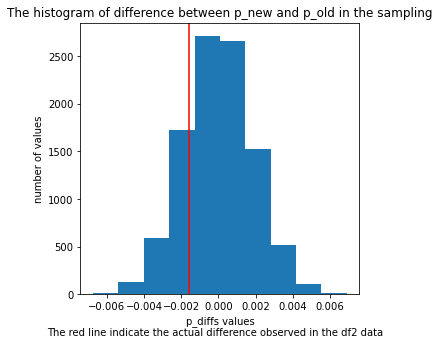

In [27]:
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(p_diffs)
plt.axvline(treatment - control, color='red')
plt.xlabel('p_diffs values')
plt.ylabel('number of values')
plt.title('The histogram of difference between p_new and p_old in the sampling')
plt.figtext(0.5, 0.01, "The red line indicate the actual difference observed in the df2 data", ha="center", fontsize=10);

Yes, this plot look like what I expected. Because if the H0 is true, the difference in conversion rate should be 0.0 and here the peak of the plot is for 0.0.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Calculating actual difference observed in ab_data.csv
obs_diff = treatment - control
obs_diff

-0.0015782389853555567

In [29]:
(np.array(p_diffs) > obs_diff).mean()

0.8094

The proportion of the p_diffs which are greater than actual difference observed in ***ab_data.csv*** is 0.8094.

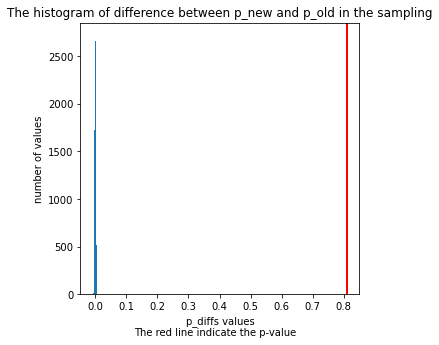

In [30]:
# The p-value can be also plotted on the histogram
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(p_diffs)
plt.axvline((np.array(p_diffs) > obs_diff).mean(), color='r', linewidth=2)
plt.xlabel('p_diffs values')
plt.ylabel('number of values')
plt.title('The histogram of difference between p_new and p_old in the sampling')
plt.figtext(0.5, 0.01, "The red line indicate the p-value", ha="center", fontsize=10);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In **j.** I computed the p-value, which is the probability of statistics to be true if the H0 is true. When this value is greater than some value (usually 0.05), we believe that H0 is true. When this value is smaller than some value (usually 0.05), we believe that H1 is true. In this case we fail to reject the null hypothesis. So the new version isn't better than the old one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [32]:
# Printing values computed in the cell above just to check if their looks fine
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
count_array = [convert_old, convert_new]
nobs_array = [n_old, n_new]

In [34]:
# Since my H1 says p_old < p_new, I will perform right tail z_test
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z-score and p-value helps us to choose what hypothesis (H0 or H1) we believe is true.
<br>P-value, as previously, tells us about the probability of statistics to be true if the H0 is true.
<br>For a right-tailed test, we can reject the null hypothesis if 𝑍𝑠𝑐𝑜𝑟𝑒  >  𝑍𝛼. And the 𝑍𝛼 can be computed as follow:

In [35]:
from scipy.stats import norm
Z_alpha = norm.ppf(1-(0.05))
print(Z_alpha) #which is true for one side test with the confidence of 95%

1.6448536269514722


In [36]:
# Now we need to check if 𝑍𝑠𝑐𝑜𝑟𝑒 > 𝑍𝛼
z_score > Z_alpha

False

Based on the comparison of 𝑍𝑠𝑐𝑜𝑟𝑒 and 𝑍𝛼, we fail to reject the null hypothesis, which gives us the same conflusion as in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I should perform logistic regression, because there are two possible outcomes in the model (conversion or lack of conversion).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2[['ab_page', 'ab_page_1']] = pd.get_dummies(df['landing_page'])
df2 = df2.drop('ab_page_1', axis=1)

In [38]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
# statsmodels.api library imported in the beggining of the Notebook
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:               8.077e-06
Time:                        16:57:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

The p-value associated with ***ab_page*** is 0.190.
It differs from the value found in ***Part II***, because in part two one-tailed z-test was computed and in the regression model two-tailed test is computed.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The fact of conversion might be influenced also by the other factor for example the time where user visited the website might affect the conversion. And when it would turn out that users from only one group enter the website in the time where the most conversions occur, our conclusion might be biased. 
<br> However, when adding more variables to the model we have to be carefull, because multicolinearity might occur. Which is the situation that our x-variables are additionaly correlated with each other, not only with y variable. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [44]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [45]:
### Creating, fitting and summarizing Logistic Regression Model
logistic_model_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
result_2 = logistic_model_2.fit()
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:               2.323e-05
Time:                        16:58:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

Before interpreting the results it will be worth to check if the multicollinearity occurs to be sure, we can interpret those results.
<br>Multicolinearity can be checked by calculating VIF factor. If VIF factor is greater than 10, the multicolinearity occurs.

In [46]:
# Computing VIF factor
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~ ab_page + UK + UK', df_new, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,2.334898,Intercept
1,1.000004,ab_page
2,1.000004,UK


All of the VIF factors are smaller than 10, so multicollinearity doesn't occur.

Among `ab_page`, `UK` and `US` variables, none of them seems to have statistical significance in predicting the conversion (p-value > 0.05 in all cases).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
df_new['ab_page_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_page_US'] = df_new['ab_page'] * df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,ab_page_UK,ab_page_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [48]:
### Fit Your Linear Model And Obtain the Results
logistic_model_3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
result_3 = logistic_model_3.fit()
result_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:               3.482e-05
Time:                        16:58:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

P-values for all of those x-variables are grater than 0.05 so none of those are statistically significant for predicting the users conversion.

## Final Conclusions

Based on all of the above results, it can be said that the new page doesn't impact to more conversions compared to the old version. However the practical part of this problem cannot be forgotten. The reason of this sitaution (the old page converted better) might be that users are just getting used to the old version of the page.
<br>From the regression part, it seems that the country the users comes from doesn't have any impact on conversion.

## Resources
While working on this project, as external resources I used only questions posted by other users under Mentor Help and available on knowledge.udacity.com